# <u>TP2</u>

## par Antoine Boissinot  - -  François Gaudreault  - -  Béatrice Lessard-Hamel

## Présenté à M. Philippe Després

### Date de remise : 8 mars 2021

In [1]:
import numpy as np
from math import sqrt, pi
from numpy import exp, linspace
from pylab import plot, show, xlabel, ylabel, grid
import matplotlib.pyplot as plt
import timeit
from scipy import integrate 

## Numéro 1
L'équation de Schrödinger indépendante du temps en une dimension: 
$$ \left[-\frac{\hbar^{2}}{2 m} \frac{d^{2}}{d x^{2}}+V(x)\right] \psi_{n}(x)=E_{n} \psi_{n}(x) $$ 


est seulement soluble analytiquement pour certains potentiels $V(x)$. Même numériquement résoudre directement l'équation peut s'avérer assez complexe. Dans le cas présent, le potentiel utilisé est celui de Lennard-Jones: $$V(x)=4 V_{0}\left[\left(\frac{\sigma}{x}\right)^{12}-\left(\frac{\sigma}{x}\right)^{6}\right].$$ 
Aucune solution analytique n’a été trouvée pour ce potentiel.

Une façon d'obtenir des solutions est d'utiliser l'approximation WKB. Rapidement, les solutions de l'équation de Schrödinger sont souvent complexes, qu'on peut écrire $\psi(x)=A(x) e^{i \varphi(x)}$ où $A(x)$ est l'amplitude et $\phi(x)$ la phase. Il est ensuite possible de remplacer dans l'équation de Schrödinger: 
$$A(x)^{\prime \prime}+2 i A(x)^{\prime} \varphi(x)^{\prime}+i A(x)^{\prime} \varphi(x)^{\prime \prime}-A(x)\left(\varphi(x)^{\prime \prime}\right)^{2}=-A(x) \frac{p(x)^{2}}{\hbar^{2}},$$ 

où $p(x)=\sqrt{2 m(E-U(x))}$. L'approximation WKB consiste à supposer que l'amplitude varie lentement et donc que $A(x)^{\prime \prime} = 0$, cela permet de simplifier grandement les expressions est d'obtenir la solution suivante pour la fonction d'onde: $$\psi(x) \cong \frac{C}{\sqrt{p(x)}} e^{\pm \frac{1}{\hbar} \int p(x) d x},$$ où $C$ est une constante. Cette fonction d'onde a des solutions différentes dans les régions $V(x) > E$ et $V(x) < E$. On appelle *points de rebroussement* les points où le passage d'une région à une autre s'effectue. Pour que la solution existe, celle-ci doit être continue dans tout le domaine, il est important de s'en assurer aux points tournants [1]. En faisant le développement mathématique cette condition de continuité apporte une règle qu'on appelle *la quantification de Bohr-Sommerfeld*: $$\frac{1}{\hbar} \int_{x-}^{x+} p_{n}(x) \mathrm{d} x \equiv \frac{1}{\hbar} \int_{x-}^{x+} \sqrt{2 m\left(E_{n}-V(x)\right)} \mathrm{d} x=\pi\left(n+\frac{1}{2}\right),$$ 
où $x-$ et $x+$ sont les points de rebroussement de la région [2]. Cette équation nous permet de déterminer quelles valeurs d'énergies sont des solutions du potentiel étudié. 

Dans notre cas, le potentiel de Lennard-Jones adimensionnel, on doit résoudre: $$\gamma \int_{x-}^{x+}\left[\epsilon_{n}-v(x)\right]^{1 / 2} d x=(n+1 / 2) \pi,$$ avec $$v(x)=4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right].$$ 

Toutefois, avant d'être en mesure d'effectuer l'intégrale numériquement, il faut déterminer la position des points de rebroussement. Les points de rebroussement sont les points où: $$\epsilon_n - v(x) = 0.$$ 
On peut réarranger l'équation comme une équation du deuxième degrée en effectuant une substitution et trouver facilement: $$x=\pm\left( \sqrt[6]{2} \sqrt[6]{-\frac{\sqrt{\epsilon_n+1}+1}{\epsilon_n}}\right).$$ On sait que x représente la distance entre deux molécules la solution négative est impossible. Par contre, la valeur négative de la racine d'ordre 2 peut aussi être une solution. Ce qui permet d'obtenir: $$ x- = \sqrt[6]{2} \sqrt[6]{\frac{\sqrt{\epsilon_n+1}-1}{\epsilon_n}}$$ et $$x+ = \sqrt[6]{2} \sqrt[6]{-\frac{\sqrt{\epsilon_n+1}+1}{\epsilon_n}}.$$  Par inspection, l'équation nous informe  aussi des valeurs que peuvent prendre les énergies discrètes, soit entre -1 et 0.

## Numéro 2 
Pour être en mesure de mesure de trouver les valeurs des énergies discrètes du potentiel de Lennard-Jones il faut tout d'abord définir celui-ci ainsi que le point de rebroussement en fonction de l'énergie:

In [2]:
def LJP(x):
    """
    The function return the adimensional Leonard-Jones Potential values
    
    param 1 x: x is the adimensional distance value 
    return: adimensional Leonard-Jones Potential value 
    """ 
    return 4*((1/x)**12 - (1/x)**6)
    
def turning_points(epsilon):
    """
    The function gives the turning points of the adimensional Leonard-Jones Potential
    for different energy values
    
    param 1 epsilon: epsilon is the adimensional energy value of which the turning points are searched 
    return: The two turning point of the function for the energy value  
    """ 
   
    first_tp = 2**(1/6) * (sqrt(epsilon+1)/epsilon-1/epsilon)**(1/6)
    second_tp = 2**(1/6) * (-((sqrt(epsilon+1)+1)/epsilon))**(1/6)
    return first_tp, second_tp

On peut alors définir la fonction retournant les valeurs d'énergies des n premiers niveaux, en fonction de la constante gamma:

In [3]:
def LJP_discrete_energy_bissection(n, gamma):
    """
    The function gives the n first adimensional discrete energy values using the WKB approximation the solve the Schrödinger equation
    for the Lennard-Jones potential, using the bissection method 
    
    param 1 n: n is the number of energy levels to find, it must be a positive integer   
    param 2 gamma: gamma is a constant that varies between each molecule, it must have a positive value 
    return: The n first adimensional discrete energy values   
    """ 
    energies = [] #The list of the n first discrete energy values 
    accuracy = 10e-08 #The accuracy of energy we're looking for
    def f(epsilon, n): # function that return the value of the function that must be approximately equal to 0 following the quantization rule
        func = lambda x: (epsilon - LJP(x))**0.5 # The function to integrate, i.e., (E - V(x))**(1/2) 
        integral = lambda epsilon: integrate.quad(func, a = turning_points(epsilon)[0], b = turning_points(epsilon)[1])[0] #the integral at the turning_points
        return integral(epsilon) - (n+0.5)*pi/gamma
    
    def midpoint(x1, x2): 
        return (x1 + x2) / 2

    def have_same_sign(x1, x2): #function used for the bissection method 
        if x1 < 0 and x2 < 0 or x1 > 0 and x2 > 0:
            return True
        else:
            return False
    
    for i in range(n): # we repeat the loop for the n energies
        
        #Initial values of the bissection method 
        x1 = -0.9999999
        x2 = -0.0000001
        
        # From here we start the bissection method 
        
        while abs(x1 - x2) > accuracy: 
            x = midpoint(x1, x2)
            if have_same_sign(f(x1, i), f(x, i)):
                x1 = x
            elif have_same_sign(f(x, i), f(x2, i)):
                x2 = x
            elif abs(x) < accuracy:
                return x
        
        energies.append(midpoint(x1, x2))
    return energies 

## Numéro 3  
Il est possible de modéliser les niveaux d'énergie de la molécule $O_2$ en utilisant le potentiel de Lennard-Jones avec un $\gamma$ de 150. Les 20 premiers niveaux d'énergies sont illustrés sur la figure suivante ainsi que les points de remboursements affichés en rouge:  

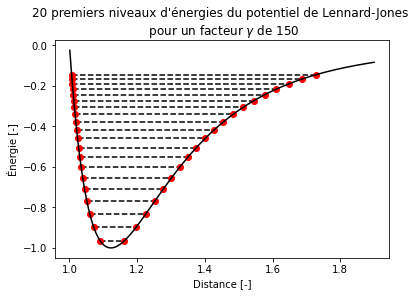

Les valeurs d'énergies E_n sont:
E_0 = -0.9647641146487056
E_1 = -0.8966716032618702
E_2 = -0.8317034475199998
E_3 = -0.7698014733014287
E_4 = -0.7109066124149979
E_5 = -0.6549587833907902
E_6 = -0.6018968318754971
E_7 = -0.5516586498416842
E_8 = -0.5041811755877912
E_9 = -0.4594002149242341
E_10 = -0.41725032196413875
E_11 = -0.377665156751138
E_12 = -0.340577068026942
E_13 = -0.3059172720452369
E_14 = -0.27361573336241846
E_15 = -0.24360110523296
E_16 = -0.2158009084233105
E_17 = -0.19014123318873047
E_18 = -0.16654685848255749
E_19 = -0.14494119235157368


In [4]:
def plot_energy_levels(n, gamma): 
    x_LJP = np.linspace(1.001,1.9,1000)
    for i in range(n):
        epsilon = LJP_discrete_energy_bissection(n, gamma)[i]
        TP1 = turning_points(epsilon)[0] #The first turning point
        TP2 = turning_points(epsilon)[1]
        #Plot the energy levels 
        plt.plot(np.linspace(TP1, TP2, 1000), np.full(1000, epsilon) , color = "black", linestyle = "dashed") #Plot energy values
        plt.plot(TP1, epsilon, color = "red",  marker='o') #Plot the first TP
        plt.plot(TP2, epsilon, color = "red",  marker='o') #Plot the second TP 
    plt.xlabel("Distance [-]")
    plt.ylabel("Énergie [-]")
    plt.plot(x_LJP, LJP(x_LJP), color = "black") #Plot the Lennard-Jones potential
    plt.title("{} premiers niveaux d'énergies du potentiel de Lennard-Jones \n pour un facteur ".format(n) + r'$\gamma$ de {}'.format(gamma))
    plt.show()

plot_energy_levels(20, 150)
print("Les valeurs d'énergies E_n sont:")
for i in range(20):
    print("E_{}".format(i) + " = {}".format(LJP_discrete_energy_bissection(20, 150)[i])) 

## Numéro 4
Il est possible d'obtenir ces niveaux d'énergie à partir d'autres méthodes que celle de la bissection:

In [5]:
def LJP_discrete_energy_secant(n, gamma):
    """
    The function gives the n first adimensional discrete energy values using the WKB approximation the solve the Schrödinger equation
    for the Lennard-Jones potential, using the secant method 
    
    param 1 n: n is the number of energy levels to find, it must be a positive integer   
    param 2 gamma: gamma is a constant that varies between each molecule, it must have a positive value 
    return: The n first adimensional discrete energy values   
    """ 
    accuracy = 10e-08 #The accuracy of energy we're looking for
    energies = [] #The list of the n first discrete energy values 
    def f(epsilon, n): # function that return the value of the function in the equation (3)  
        func = lambda x: (epsilon - LJP(x))**0.5 # The function to integrate, i.e., (E - V(x))**(1/2) 
        integral = lambda epsilon: integrate.quad(func, a = turning_points(epsilon)[0], b = turning_points(epsilon)[1])[0] #the integral at the turning_points
        return integral(epsilon) - (n+0.5)*pi/gamma
    
    for i in range(n): # we repeat the loop for the n energies
        
        #Initial values of the secant method 
        x1 = -0.9999999
        x2 = -0.0000001 
        # From here we start the secant method 
        while abs(x2 - x1) > accuracy:
            x3 = x2 - f(x2, i) * (x2 - x1) / float(f(x2,i) - f(x1, i))
            x1, x2 = x2, x3
        energies.append(x3)
    
    return energies 
print(LJP_discrete_energy_secant(20, 150))

[-0.9647641336579035, -0.8966715796975735, -0.8317034313570082, -0.7698014929141591, -0.7109066347074517, -0.6549587662986195, -0.6018968089856668, -0.5516586677390721, -0.5041812026014736, -0.4594001996079773, -0.4172503413372344, -0.37766517713307507, -0.34057709317325413, -0.305917282486967, -0.2736157150989983, -0.24360110849382083, -0.2158008986109401, -0.19014121168803091, -0.16654683716032742, -0.144941202064848]


Il peut être pertinent de comparer les vitesses de convergence des deux méthodes afin de savoir laquelle des méthodes est la plus pertinente de cette application: 

In [6]:
time_secant = timeit.timeit('[LJP_discrete_energy_secant(20, 150)]', number = 1, globals=globals())
time_bissection = timeit.timeit('[LJP_discrete_energy_bissection(20, 150)]', number = 1, globals=globals())
print("Le temps pour la méthode de la sécante est: {}".format(time_secant))
print("Le temps pour la méthode de la bissection est: {}".format(time_bissection))

Le temps pour la méthode de la sécante est: 0.19142950000002656
Le temps pour la méthode de la bissection est: 0.5452741999999944


La rapidité presque 3 fois supérieure de la méthode de la sécante peut s'expliquer par la convergence quadratique de la méthode de la sécante, on peut visualiser cette convergence pour une valeur d'énergie: 

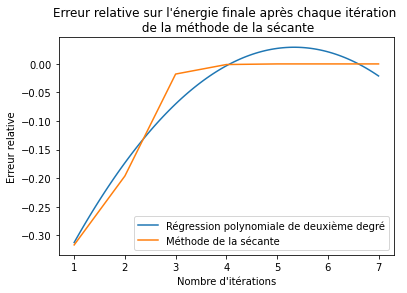

In [7]:
def secant_convergence(n, gamma):
    """
    The function gives the energy values after each iteration for the secant method of the Lennard-Jones potential
    
    param 1 n: n is the level for which we want to find the energy, it must be a positive integer   
    param 2 gamma: gamma is a constant that varies between each molecule, it must have a positive value 
    return: The energy value after each iteration of the secant method   
    """ 
    accuracy = 10e-08 #The accuracy of energy we're looking for
    energy_iteration = [] #The list of energy after each iteration 
    
    def f(epsilon, n): # function that return the value of the function in the equation (3)  
        func = lambda x: (epsilon - LJP(x))**0.5 # The function to integrate, i.e., (E - V(x))**(1/2) 
        integral = lambda epsilon: integrate.quad(func, a = turning_points(epsilon)[0], b = turning_points(epsilon)[1])[0] #the integral at the turning_points
        return integral(epsilon) - (n+0.5)*pi/gamma
    
    #Initial values of the secant method 
    x1 = -0.9999999
    x2 = -0.0000001 
        # From here we start the secant method 
    while abs(x2 - x1) > accuracy:
        x3 = x2 - f(x2, n) * (x2 - x1) / float(f(x2, n) - f(x1, n))
        x1, x2 = x2, x3
        energy_iteration.append(x3) #Each energy iteration
    
    return energy_iteration 

rel_error = []
iteration = []

for i in range(len(secant_convergence(3, 150))):
    rel_error.append(abs(secant_convergence(5, 150)[i] - secant_convergence(5, 150)[-1])/secant_convergence(5, 150)[-1])
    iteration.append(i+1)

    

z = np.polyfit(iteration, rel_error, 2)
p = np.poly1d(z)
x = np.linspace(1, 7, 100)

plt.plot(x, p(x), label = "Régression polynomiale de deuxième degré")
plt.plot(iteration, rel_error, label = "Méthode de la sécante")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Erreur relative")
plt.title("Erreur relative sur l'énergie finale après chaque itération \n de la méthode de la sécante")
plt.legend()
plt.show()

## Numéro 5  

Afin d'établir un programme permettant d'obtenir $p$ avec la méthode de relaxation selon un $R_0$ allant de 0 à une valeur maximale, il faut absolument savoir la valeur de $R_0$ maximale ainsi que le nombre de bonds acceptable pour faire une représentation graphique acceptable. Ces deux dernières valeurs permettent d'obtenir le nombre de points à résoudre par la méthode de relaxation. La méthode de solution itérative est ensuite enclenchée, selon une valeur de départ choisie, tant que l'erreur de la solution est plus grande que la précision minimale établie. La valeur de départ pour les itérations est de valeur arbitraire entre 0.1 et 1.4 pour ce type d'équation.

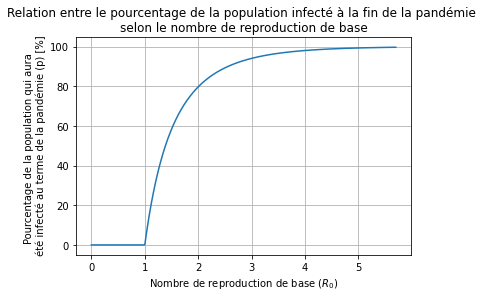

In [8]:
def p_graph(R0_max, start, accuracy, steps):
    

    """Calcul itératif du pourcentage de la population qui aura été infecté au terme de la pandémie

    --Paramètres:
       R0_max: Nombre de reproduction de base maximale en supposant que le fluctuation commence à 0
       start: Valeur de départ pour l'itérations allant de 0.1 à 1.4
       accuracy: précision de l'erreur de p
       steps: Bonds par itérations

    --Retourne un graphique de p en fonction de R0
    """
    points = int(R0_max / steps)


# Liste pour le graphique

    y = []
    temp = linspace(0, R0_max, points)

# R0 loop

    for R0 in temp:
        p1 = start
        error = 1.0
    
    # Loop jusqu'à l'erreur établie
    
        while error > accuracy:
            p1,p2 = 1 - exp(-R0*p1),p1
            error = abs((p1-p2)/(1 - 1 / (R0 * exp(-R0 * p1))))
        
        # Ajout des valeurs convergées et transformation en pourcentage
        
        y.append(100 * p1)
    
#Graphique    
    
    plot(temp,y)
    xlabel("Nombre de reproduction de base ($R_0$)")
    ylabel("Pourcentage de la population qui aura \n été infecté au terme de la pandémie (p) [%]")
    plt.title("Relation entre le pourcentage de la population infecté à la fin de la pandémie \nselon le nombre de reproduction de base")
    grid()
    show()
        
np.seterr(divide = 'ignore')

p_graph(5.7,1,1e-6,0.01)

## Numéro 6  
Selon le début de démarche présenté dans l'énoncé, on sait que $x'$ est représenté selon la méthode de relaxation accélérée comme suit :
$$ x'=(1+\omega)f(x)-\omega x.$$
Sachant que $x^{*} = f(x^{*})$, il est possible de redéfinir $x'$ en faisant son développement en série de Taylor comme suit :
$$x'  = ((1+\omega)f'(x^{*})-\omega)(x-x^{*}) + f(x^{*}) + ...~;$$
$$\Rightarrow x'  \simeq ((1+\omega)f'(x^{*})-\omega)(x-x^{*}) + x^{*}.$$
Comme $\varepsilon = x - x^{*}$ et que $\varepsilon ' = x' - x^{*}$, on obtient :
$$x' - x^{*} = [(1+\omega)f'(x^{*})-\omega](x-x^{*})~; $$
$$\Rightarrow \varepsilon ' = [(1+\omega)f'(x^{*})-\omega]\varepsilon~;$$
$$\Rightarrow \varepsilon = \frac{\varepsilon'}{(1+\omega)f'(x^{*})-\omega}.$$
En réinsérant les termes dans $x^{*} = x' +\varepsilon'$, on obtient : 
$$x^{*} = x' +\varepsilon'~;$$
$$\Rightarrow \varepsilon' =x^{*} - x' ; $$
$$= x + \varepsilon - x' ; $$
$$= x + \frac{\varepsilon'}{(1+\omega)f'(x^{*})-\omega} - x'~;$$
$$\Rightarrow \varepsilon' \left(1 - \frac{1}{(1+\omega)f'(x^{*})-\omega}\right) = x-x'.$$
Finalement, on obtient : 
$$ \therefore \varepsilon' \simeq \frac{x-x'}{1-1/[(1+\omega)f'(x^{*})-\omega]}.$$

## Numéro 7  

Ce programme ressemble beaucoup à celui du numéro 5, en enlevant les commandes pour la réalisation d'un graphique. Il est donc inutile de savoir le nombre de bonds (*steps*) pour ce programme. La valeur maximale de $R_0$ est aussi omise puisqu'il faut faire l'itération pour une seule valeur de $R_0$. Le programme permet de *return* la dernière valeur p de la boucle *while* ainsi que la valeur du nombre d'itérations. Elle retourne aussi la valeur de $R_0$ et la valeur de départ afin d'en faire des variables globales.

In [9]:
def p_nb_iter(R0,start,accuracy):
    """
    --Calcul du nombre d'itération du pourcentage de la population qui aura été infecté au terme de la pandémie
    --Selon la méthode de relaxation

    --Paramètres:
       R0: Nombre de reproduction de base 
       start: Valeur de départ pour l'itérations allant de 0.1 à 1.4
       accuracy: précision de l'erreur de p

    --Retourne le nombre d'itération, la solution convergente à la précision préétablie selon la méthode de relaxation,
    --la valeur de R0 et la valeur de départ pour en faire des variables globales
    """
    iteration = 1
    def f(p):
        return 1 - exp(- R0 * p)

    def error(p1, p2):
        return (p1 - p2) / (1 - 1 / (R0 * exp(-R0 * p1)))

    p1 = start # valeur de départ
    p2 = f(p1)
    while(abs(error(p1, p2)) > accuracy):
        p1, p2 = p2, f(p2)
        iteration += 1
    return iteration,p2,R0,start


print("Pour un nombre de reproduction de base (R_0) de {:} et une valeur de départ de {:}, on obtient un pourcentage \nde population (p) de {:.2f} %, en {:} itérations.".format(p_nb_iter(2,1,1e-6)[2],p_nb_iter(2,1,1e-6)[3],p_nb_iter(2,1,1e-6)[1]*100,p_nb_iter(2,1,1e-6)[0]))

Pour un nombre de reproduction de base (R_0) de 2 et une valeur de départ de 1, on obtient un pourcentage 
de population (p) de 79.68 %, en 14 itérations.


## Numéro 8  

Pour ce programme, il faut d'abord faire une fonction (*over_relax()*) utilisant la méthode de relaxation accélérée. Cette fonction permet de retourner le nombre d'itérations et la valeur finale de p ainsi que la valeur de $R_0$ et la valeur de départ afin d'en faire des variables globales, comme le programme précédent. En effet, cette fonction ressemble grandement au programme précédent, par contre on utilise l'erreur calculée au numéro 6.<br />
Ensuite, une fonction *over_graph()* fait une boucle à partir de la fonction *over_relax()* afin de faire une représentation graphique du nombre d'itérations selon la variable $omega$ d'entrée.

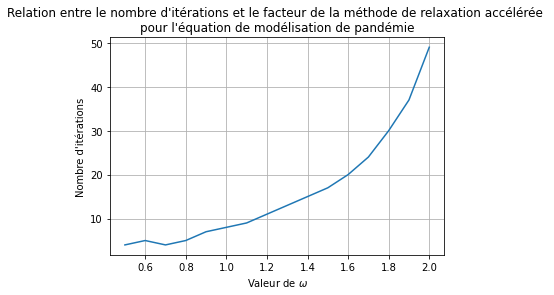

Selon la courbe ci-dessus, pour un nombre de reproduction de base (R_0) de 2 et une valeur de départ de 1, la valeur 
optimale de omega est 0.5 ou 0.7, afin d'obtenir une valeur de p de 79.68% en seulement 4 itérations


In [10]:
def over_relax(R0, omega,start, accuracy):
    #--Calcul du nombre d'itération du pourcentage de la population qui aura été infecté au terme de la pandémie
    #--Selon la méthode de relaxation accélérée

    #--Paramètres:
    #   R0: Nombre de reproduction de base 
    #   omega: paramètre de relaxation accélérée
    #   start: valeur de départ pour l'itération allant de 0.1 à 1.4
    #   accuracy: précision de l'erreur de p

    #--Retourne le nombre d'itération, la valeur finale de p selon la méthode de relaxation accélérée,
    #--la valeur de R0 ainsi que la valeur de départ
    
    iteration = 1

    def f(p):
        return 1 - exp(- R0 * p)

    def f_derive(p):
        return R0 * exp(- R0 * p)

    def error(p1, p2):
        return (p1 - p2) / (1 - 1 / ((1 + omega) * f_derive(p1) - omega))

    p1 = start  # valeur de départ
    p2 = (1 + omega) * f(p1) - omega * p1
    while abs(error(p1, p2)) > accuracy:
        p1, p2 = p2, (1 + omega) * f(p2) - omega * p2
        iteration += 1
    return iteration,p2,R0,start

def over_graph(R0,start,accuracy):
    #-- Calcul le graphique du nombre d'itération de la méthode de relaxation accélérée selon le paramètre omega partant 
    #-- de 0.5 en allant jusqu'à 2 en bond de 0.1
    
    #--Paramètres:
    #   R0: Nombre de reproduction de base 
    #   start: valeur de départ pour l'itération allant de 0.1 à 1.4
    #   accuracy: précision de l'erreur de p

    #--Retourne un graphique du nombre d'itération selon le paramètre de relaxation accélérée
    
    
    y = []
    temp = linspace(0.5,2,16)
    
    for omega in temp:
        iterations = over_relax(R0,omega,start, accuracy)[0]
        
        y.append(iterations)
        
    #Graphique    
    
    plot(temp,y)
    xlabel("Valeur de $\omega$")
    ylabel("Nombre d'itérations")
    plt.title("Relation entre le nombre d'itérations et le facteur de la méthode de relaxation accélérée \npour l'équation de modélisation de pandémie")
    grid()
    show()
    
over_graph(2,1,1e-6)
print("Selon la courbe ci-dessus, pour un nombre de reproduction de base (R_0) de {:} et une valeur de départ de {:}, la valeur \noptimale de omega est 0.5 ou 0.7, afin d'obtenir une valeur de p de {:.2f}% en seulement {:} itérations".format(over_relax(2, 0.5,1, 1e-6)[2],over_relax(2, 0.5,1, 1e-6)[3],over_relax(2, 0.5,1, 1e-6)[1]*100,over_relax(2, 0.5,1, 1e-6)[0]))

## Numéro 9  
Il est possible de vouloir utiliser un $\omega < 0$, si les bonds d'itérations sont trop grands et que l'algorithme ne peut pas atteindre la solution. Les itérations sont tellement espacées que la convergence n’est  plus possible ou la solution est supérieure à celle recherchée puisqu’elle a été dépassée. Par exemple, si l'on commence à $x = 3$ dans l'algorithme précédent, on obtient à la prochaine itération $x' = 4$. Par contre, on sait que la solution est inférieure puisqu'elle est de $x^{*} = 3.14$. En bref, il faut réduire la *petite tape dans le dos* afin d'arriver à la solution sans la dépasser. 

## Réferences
[1] Griffiths, D. J. (2010). Introduction to quantum mechanics. Prentice Hall, second edi. 

[2] Karnakov, B. M., & Krainov, V. P. (2012). WKB Approximation in Atomic Physics. Springer Science & Business Media.